In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mo_utils.utils.tmux_utils import get_session_list,tmux_session,get_session_name,kill_session
from pathlib import Path

libtmux not installed ??


In [3]:
import pandas as pd
df = pd.read_csv('exp.csv')

In [100]:
get_session_list()

[Session($29 sd_eval_naive-20steps_gpu=0), Session($28 sd_eval_native20_gpu=0)]

In [77]:
kill_session()

before kill sessions=[Session($17 sd_eval_naive-20steps_gpu=0), Session($16 sd_eval_naive-50step_gpu=0), Session($27 sd_eval_native20_gpu=1), Session($26 sd_eval_native50_gpu=2), Session($20 sd_eval_qdiff-20steps_gpu=2), Session($19 sd_eval_qdiff-50steps-split-to-16_gpu=1), Session($21 sd_eval_qdiff-50steps-split-to-16_gpu=2), Session($18 sd_eval_qdiff-50steps_gpu=0)]
after kill sessions=[]


In [78]:
df.name[0]

'naive-50step'

In [121]:
ind = 4
df.iloc[ind]#.cali_ckpt              

name                                                       qdiff-20steps
cali_ckpt              /workspace/sd/qdiff/output_quantization/2025-0...
bit                                                                  8.0
symmetric                                                           True
quant_act_ops                                                       True
ddim_steps                                                          20.0
act_bits                                                            16.0
split_to_16bits                                                    False
naive_quant_weights                                                False
wandb                  https://wandb.ai/hailo-mo/q-diff-split_to_16bi...
Name: 4, dtype: object

In [122]:
#df.iloc[ind].name
df.name[ind]

'qdiff-20steps'

In [ ]:
native = False
if not native:
    cmd=f"""python scripts/gen_ver_images.py 
    --cali_ckpt {df.iloc[ind].cali_ckpt}
    --nbit {int(df.iloc[ind].bit)}
    --symmetric {df.iloc[ind].symmetric}
    --quant_act_ops {df.iloc[ind].quant_act_ops}
    --ddim_steps {int(df.iloc[ind].ddim_steps)}
    --act_bits {int(df.iloc[ind].act_bits)}
    --split_to_16bits {df.iloc[ind].split_to_16bits}
    --naive_quant_weights {df.iloc[ind].naive_quant_weights}
    --output_dir /workspace/sd/ver_images/puppy/{df.name[ind]}
    --act_quant true
    --weight_quant true
    --num_images 12
    --prompt "a puppy wearing a hat" 
    """
else:
    steps = 20
    cmd=f"""python scripts/gen_ver_images.py 
    --cali_ckpt none
    --nbit 0
    --symmetric false
    --quant_act_ops false
    --ddim_steps {steps}
    --act_bits 0
    --split_to_16bits false
    --naive_quant_weights false
    --output_dir /workspace/sd/ver_images/native_{steps}
    --act_quant false
    --weight_quant false
    --num_images 12
    """

In [124]:
cmd = cmd.replace('\n',' ')

In [125]:
cmd

'python scripts/gen_ver_images.py      --cali_ckpt /workspace/sd/qdiff/output_quantization/2025-02-19-16-22-19/ckpt.pth     --nbit 8     --symmetric True     --quant_act_ops True     --ddim_steps 20     --act_bits 16     --split_to_16bits False     --naive_quant_weights False     --output_dir /workspace/sd/ver_images/puppy/qdiff-20steps     --act_quant true     --weight_quant true     --num_images 12     --prompt "a puppy wearing a hat"      '

In [127]:
gpu = 3

In [128]:
inst_list = [f'cd {Path.home() / "q-diffusion"}',
            f'conda activate qdiff',
            f'export CUDA_VISIBLE_DEVICES={gpu}',
            cmd]

In [129]:
inst_list

['cd /home/nadavg/q-diffusion',
 'conda activate qdiff',
 'export CUDA_VISIBLE_DEVICES=3',
 'python scripts/gen_ver_images.py      --cali_ckpt /workspace/sd/qdiff/output_quantization/2025-02-19-16-22-19/ckpt.pth     --nbit 8     --symmetric True     --quant_act_ops True     --ddim_steps 20     --act_bits 16     --split_to_16bits False     --naive_quant_weights False     --output_dir /workspace/sd/ver_images/puppy/qdiff-20steps     --act_quant true     --weight_quant true     --num_images 12     --prompt "a puppy wearing a hat"      ']

In [ ]:
task = 'eval'
if not native:
    sess_name = get_session_name(f'sd_{task}_{df.name[ind]}_{gpu=}')
else:
    sess_name = get_session_name(f'sd_{task}_native{steps}_{gpu=}')

#sess_name = sess_name if not debug else sess_name + '_debug'

sess_name

'sd_eval_qdiff-20steps_gpu=3'

In [131]:
tmux_session(sess_name,inst_list)

tmux attach -t "sd_eval_qdiff-20steps_gpu=3"


'sd_eval_qdiff-20steps_gpu=3'

In [ ]:
#kill_session(kill_only=sess_name)

before kill sessions=[Session($17 sd_eval_naive-20steps_gpu=0), Session($16 sd_eval_naive-50step_gpu=0), Session($25 sd_eval_native50_gpu=2), Session($20 sd_eval_qdiff-20steps_gpu=2), Session($19 sd_eval_qdiff-50steps-split-to-16_gpu=1), Session($21 sd_eval_qdiff-50steps-split-to-16_gpu=2), Session($18 sd_eval_qdiff-50steps_gpu=0)]
after kill sessions=[Session($17 sd_eval_naive-20steps_gpu=0), Session($16 sd_eval_naive-50step_gpu=0), Session($20 sd_eval_qdiff-20steps_gpu=2), Session($19 sd_eval_qdiff-50steps-split-to-16_gpu=1), Session($21 sd_eval_qdiff-50steps-split-to-16_gpu=2), Session($18 sd_eval_qdiff-50steps_gpu=0)]


In [2]:
from gen_ver_images import gen_ver_images

/home/nadavg/anaconda3/envs/qdiff/lib/python3.8/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/nadavg/anaconda3/envs/qdiff/lib/python3.8/site-packages/transformers/modeling_utils.py:371: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly 

In [3]:
import torch
torch.set_warn_always(False)

In [4]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

In [5]:
os.environ['CUDA_VISIBLE_DEVICES']

'2'

In [6]:
import pandas as pd
df = pd.read_csv('exp.csv')

In [7]:
df.columns

Index(['name', 'cali_ckpt', 'bit', 'symmetric', 'quant_act_ops', 'ddim_steps',
       'act_bits', 'split_to_16bits', 'naive_quant_weights', 'wandb'],
      dtype='object')

In [8]:
ind = 0

In [9]:
df.iloc[ind]

name                                                        naive-50step
cali_ckpt              /workspace/sd/qdiff_naive/output_quantization/...
bit                                                                  8.0
symmetric                                                           True
quant_act_ops                                                       True
ddim_steps                                                          50.0
act_bits                                                             8.0
split_to_16bits                                                    False
naive_quant_weights                                                 True
wandb                                                                NaN
Name: 0, dtype: object

In [3]:
import yaml
from pathlib import Path
prompts  = yaml.load(
                open(f'{Path.home()}/q-diffusion/scripts/prompt.yaml','r'),Loader=yaml.FullLoader
                )

In [6]:
prompts[0]

{'image': 'transion/face/1.png',
 'prompt': 'photo of a young african man wearing a lapel pin networking with peers in a private office',
 'seed': 535}

In [4]:
for ind, (_,prompt,seed) in enumerate(prompts[:6]):
    print(ind,prompt,seed)

0 prompt seed
1 prompt seed
2 prompt seed
3 prompt seed
4 prompt seed
5 prompt seed


In [7]:
prompts[0][0]

KeyError: 0

In [12]:
grid = gen_ver_images(cali_ckpt= df.cali_ckpt[ind],
                      nbit= df.bit[ind],
                      symmetric= df.symmetric[ind],
                      quant_act_ops= df.quant_act_ops[ind],
                      ddim_steps= int(df.ddim_steps[ind]),
                      act_bits= df.act_bits[ind],
                      split_to_16bits= df.split_to_16bits[ind],
                      naive_quant_weights= df.naive_quant_weights[ind],
                      num_images = 2 )

/home/nadavg/q-diffusion/scripts/txt2img.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pl_sd = torch.load(ckpt, map_location="cpu")


LatentDiffusion: Running in eps-prediction mode


/home/nadavg/anaconda3/envs/qdiff/lib/python3.8/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/home/nadavg/anaconda3/envs/qdiff/lib/python3.8/site-packages/transformers/modeling_utils.py:371: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly 

Loading quantized model checkpoint


/home/nadavg/q-diffusion/qdiff/utils.py:385: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path, map_location='cpu')


Initializing weight quantization parameters
Initializing act quantization parameters
Loading quantized model checkpoint again


/home/nadavg/q-diffusion/qdiff/utils.py:460: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path, map_location='cpu')
/home/nadavg/anaconda3/envs/qdiff

Data shape for PLMS sampling is (5, 4, 64, 64)
Running PLMS Sampling with 50 timesteps





















































Sampling:  50%|█████     | 1/2 [01:05<01:05, 65.35s/it]

Data shape for PLMS sampling is (5, 4, 64, 64)
Running PLMS Sampling with 50 timesteps





















































Sampling: 100%|██████████| 2/2 [02:10<00:00, 65.17s/it]
/home/nadavg/anaconda3/envs/qdiff/lib/python3.8/site-packages/pytorch_lightning/utilities/seed.py:57: UserWarning: No correct seed found, seed set to 673427102
  rank_zero_warn(f"No correct seed found, seed set to {seed}")
Global seed set to 673427102


None: Keep using EMA weights


Sampling:   0%|          | 0/2 [00:00<?, ?it/s]

Data shape for PLMS sampling is (5, 4, 64, 64)
Running PLMS Sampling with 50 timesteps





















































Sampling:  50%|█████     | 1/2 [01:05<01:05, 65.10s/it]

Data shape for PLMS sampling is (5, 4, 64, 64)
Running PLMS Sampling with 50 timesteps





















































Sampling: 100%|██████████| 2/2 [02:10<00:00, 65.15s/it]


None: Keep using EMA weights


In [1]:
g = np.array(grid)

NameError: name 'np' is not defined

In [2]:
plt.imshow(g)

NameError: name 'plt' is not defined

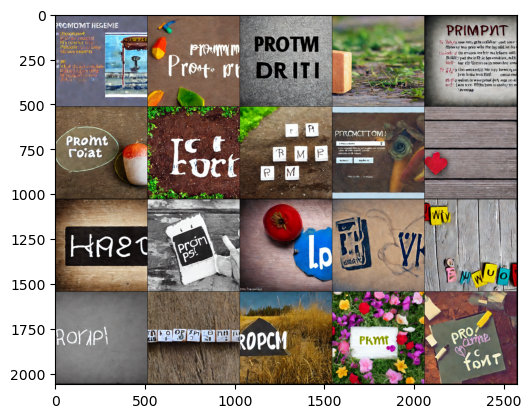

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(grid)

In [15]:
%debug

> /home/nadavg/q-diffusion/ldm/modules/diffusionmodules/util.py(49)make_ddim_timesteps()
     47     if ddim_discr_method == 'uniform':
     48         c = num_ddpm_timesteps // num_ddim_timesteps
---> 49         ddim_timesteps = np.asarray(list(range(0, num_ddpm_timesteps, c)))
     50     elif ddim_discr_method == 'quad':
     51         ddim_timesteps = ((np.linspace(0, np.sqrt(num_ddpm_timesteps * .8), num_ddim_timesteps)) ** 2).astype(int)



In [12]:
bin(1)

'0b1'

In [14]:
format(-5, '08b')

'-0000101'

In [15]:
int('0b11111011', 2)


251

In [4]:
def twos_complement(n, bits=8):
    return bin(n & (2**bits - 1))  #

In [6]:
for i in range(0,128):
    b = twos_complement(-i, 8)
    print(i, int(b, 2),256-i,(i+256) % 256)

0 0 256 0
1 255 255 1
2 254 254 2
3 253 253 3
4 252 252 4
5 251 251 5
6 250 250 6
7 249 249 7
8 248 248 8
9 247 247 9
10 246 246 10
11 245 245 11
12 244 244 12
13 243 243 13
14 242 242 14
15 241 241 15
16 240 240 16
17 239 239 17
18 238 238 18
19 237 237 19
20 236 236 20
21 235 235 21
22 234 234 22
23 233 233 23
24 232 232 24
25 231 231 25
26 230 230 26
27 229 229 27
28 228 228 28
29 227 227 29
30 226 226 30
31 225 225 31
32 224 224 32
33 223 223 33
34 222 222 34
35 221 221 35
36 220 220 36
37 219 219 37
38 218 218 38
39 217 217 39
40 216 216 40
41 215 215 41
42 214 214 42
43 213 213 43
44 212 212 44
45 211 211 45
46 210 210 46
47 209 209 47
48 208 208 48
49 207 207 49
50 206 206 50
51 205 205 51
52 204 204 52
53 203 203 53
54 202 202 54
55 201 201 55
56 200 200 56
57 199 199 57
58 198 198 58
59 197 197 59
60 196 196 60
61 195 195 61
62 194 194 62
63 193 193 63
64 192 192 64
65 191 191 65
66 190 190 66
67 189 189 67
68 188 188 68
69 187 187 69
70 186 186 70
71 185 185 71
72 184 184 72
